# Jupter, Pyplot and Numpy Problem Sheet
This is a jupyter notebook of 10 exercises based on pyplot and numpy I need to complete for the Emerging Technologies module I am taking in my course this semester

# Exercise 1 - Get & load data

In [1]:
import csv

dataFile = "Iris.csv"
seLength, seWidth, ptLength, ptWidth, irType = [], [], [], [], []

with open(dataFile, "rt") as fi:
    data = csv.reader(fi)
    for i, row in enumerate(data):
        seLength.append(row[0])
        seWidth.append(row[1])
        ptLength.append(row[2])
        ptWidth.append(row[3])
        irType.append(row[4])
        
        print(row)

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5', '3.6', '1.4', '0.2', 'Iris-setosa']
['5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['5', '3.4', '1.5', '0.2', 'Iris-setosa']
['4.4', '2.9', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.1', '1.5', '0.1', 'Iris-setosa']
['5.4', '3.7', '1.5', '0.2', 'Iris-setosa']
['4.8', '3.4', '1.6', '0.2', 'Iris-setosa']
['4.8', '3', '1.4', '0.1', 'Iris-setosa']
['4.3', '3', '1.1', '0.1', 'Iris-setosa']
['5.8', '4', '1.2', '0.2', 'Iris-setosa']
['5.7', '4.4', '1.5', '0.4', 'Iris-setosa']
['5.4', '3.9', '1.3', '0.4', 'Iris-setosa']
['5.1', '3.5', '1.4', '0.3', 'Iris-setosa']
['5.7', '3.8', '1.7', '0.3', 'Iris-setosa']
['5.1', '3.8', '1.5', '0.3', 'Iris-setosa']
['5.4', '3.4', '1.7', '0.2', 'Iris-setosa']
['5.1', '3.7', '1.5', '0.4', 'Iris-setosa']
['4.6', '3.6', '1', '0.2', 'Iris-setosa']
['

# Exercise 2 - Write a note about the data set

The Iris data set was founded by Ronald Fisher, a British man who was a statistican and biologist. It was introduced in a paper he wrote in 1936 called "The use of multiple measurements in taxonomic problems". The data set is made up of 50 samples from the 3 spicies of Iris and there is four features for each sample. The data set is used to aid in machine learning in areas such as support vector machines.

# Exercise 3 - Create a simple plot

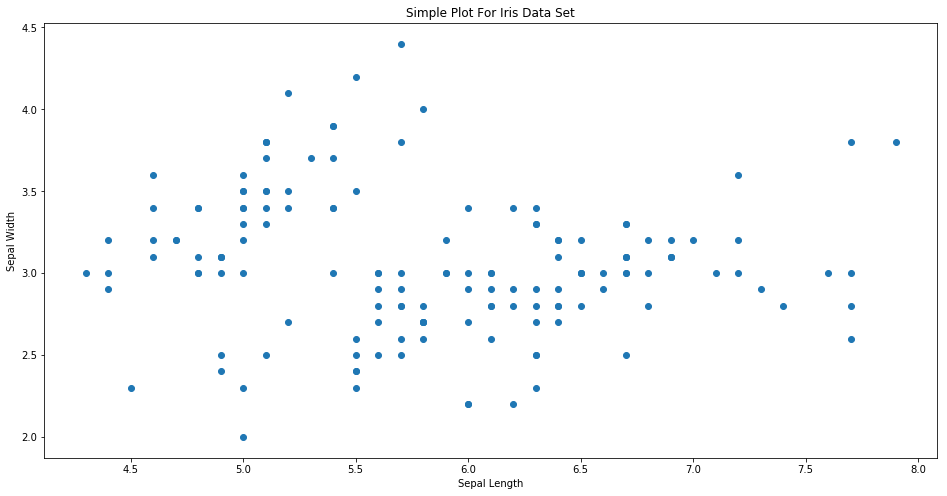

In [3]:
import matplotlib.pyplot as pl

x, y = seLength, seWidth

pl.rcParams['figure.figsize'] = (16,8)
pl.title('Simple Plot For Iris Data Set')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.scatter(x,y)
pl.show()

# Exercise 4 - Create a more complex plot

# Exercise 5 - Use seaborn

# Exercise 6 - Fit a line

# Exercise 7 - Calculate the R-squared value

# Exercise 8 - Fit another line

# Exercise 9 - Calculate the R-squared value

# Exercise 10 -  Use gradient descent